In [1]:
%matplotlib inline
from __future__ import division
from pandas import Series, DataFrame
import pandas as pd
from numpy.random import randn
import numpy as np
# pd.options.display.max_rows = 12
np.set_printoptions(precision=4, suppress=True)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 4))
pd.set_option('display.max_columns', None) #输出所有列

def set_ch():
    from pylab import mpl
    #中文字体问题已经解决，记录在evernote中
    #mpl.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
    mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
set_ch()
from datetime import datetime,timedelta
import matplotlib
matplotlib.style.use('ggplot')
import sys
import json

In [2]:
from sklearn import preprocessing
import seaborn as sns

In [9]:
df_all = pd.read_csv('data/ss_cs_human.csv').drop(['Unnamed: 0'],axis=1)

In [10]:
ss_score = (df_all.result_overall-df_all.result_overall.mean()) / df_all.result_overall.std()
cs_score = (df_all.ppScores - df_all.ppScores.mean()) / df_all.ppScores.std()
human_score = (df_all.avg_score - df_all.avg_score.mean()) / df_all.avg_score.std()

In [14]:
df_3s = DataFrame()
df_3s['singSound'] = ss_score
df_3s['CS'] = cs_score
df_3s['human'] = human_score

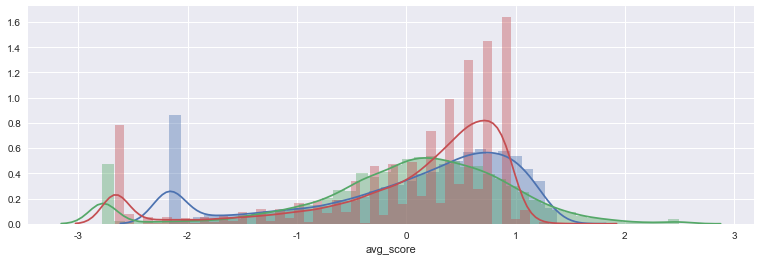

In [15]:
plt.rc('figure', figsize=(13, 4))
sns.distplot(ss_score)
sns.distplot(cs_score)
sns.distplot(human_score)

In [16]:
# scikitlearn mse
from sklearn.metrics import mean_squared_error
ss_base_MSE = mean_squared_error(ss_score, human_score)
cs_base_MSE = mean_squared_error(cs_score, human_score)
(ss_base_MSE, cs_base_MSE)

(0.40280128111059071, 0.76383860830115524)

# Symbolic regression

### singSound

In [17]:
from gplearn import genetic

In [18]:
# 准备数据
from sklearn.cross_validation import train_test_split

X_singSound = df_3s.ix[:,0].values
y_singSound = df_3s.ix[:,2].values

X_singSound_train, X_singSound_test, y_singSound_train, y_singSound_test = train_test_split(X_singSound, y_singSound, test_size=0.3, random_state=0)
X_singSound_train = X_singSound_train.reshape(-1,1)
y_singSound_train = y_singSound_train.reshape(-1,1)
X_singSound_test = X_singSound_test.reshape(-1,1)
y_singSound_test = y_singSound_test.reshape(-1,1)

X_singSound = X_singSound.reshape(-1,1)
y_singSound = y_singSound.reshape(-1,1)

/Applications/anaconda/envs/py27/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Applications/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


In [19]:
from IPython.display import Image
import pydotplus

In [20]:
# 先定义一批参数训练
function_set = ['add', 'sub', 'mul', 'div',
                'sqrt', 'log', 'neg', 'inv']
est_gp = genetic.SymbolicRegressor(population_size=500, # 随机生成的公式树数量
                           generations=20, # 迭代次数
                           function_set = function_set,
                           metric = 'mse',
                           p_crossover=0.7, # 交叉概率
                           p_subtree_mutation=0.1, # 子树变异概率
                           p_hoist_mutation=0.05, # hoiest变异概率
                           p_point_mutation=0.1, # 点变异概率
                           max_samples=0.9, # 每一代的进化中，留下的样本比例
                           verbose=1, # 包外估计
                           parsimony_coefficient=0.01, # 节俭系数，用于惩罚过于复杂的公式；值越大惩罚力度越大
                           random_state=0) #随机种子

est_gp.fit(X_singSound_train, y_singSound_train)

/Applications/anaconda/envs/py27/lib/python2.7/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


    |    Population Average   |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    15.46    1422215.99426        4   0.416257902974   0.391624843901     17.74s
   1     9.66     223.95501567        3   0.382209457024   0.393355979393     14.61s
   2     5.82    125.306375694       16   0.362362022844   0.348605160411     13.07s
   3     2.16    24.5842795267        3   0.367289301199   0.424542610343     10.63s
   4     3.19    17.8802288827        5   0.366554757502   0.406618295038      9.28s
   5      3.2    60.6822717071        3   0.365976338458   0.436357781314      8.47s
   6     3.14    2.32778668649        3   0.365840440797   0.437580705662      7.55s
   7     3.05    17548.1168701        3   0.366152487465   0.434772640648      6.87s
   8     3.15    2.51053467186        3   0.367342613921   0.424062856502  

SymbolicRegressor(const_range=(-1.0, 1.0),
         function_set=['add', 'sub', 'mul', 'div', 'sqrt', 'log', 'neg', 'inv'],
         generations=20, init_depth=(2, 6), init_method='half and half',
         max_samples=0.9, metric='mse', n_jobs=1, p_crossover=0.7,
         p_hoist_mutation=0.05, p_point_mutation=0.1, p_point_replace=0.05,
         p_subtree_mutation=0.1, parsimony_coefficient=0.01,
         population_size=500, random_state=0, stopping_criteria=0.0,
         tournament_size=20, verbose=1, warm_start=False)

mul(X0, 0.759)


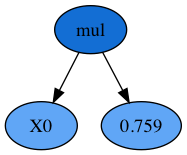

In [21]:
# 未调整参数前的结果
idx = est_gp._program.parents['parent_idx']
fade_nodes = est_gp._program.parents['parent_nodes']
print(est_gp._programs[-2][idx])
graph = est_gp._programs[-2][idx].export_graphviz(fade_nodes=fade_nodes)
graph = pydotplus.graphviz.graph_from_dot_data(graph)
Image(graph.create_png())

In [22]:
# 将得到的结果，function和对应的fitness存入dataframe
df_singSound_SR = DataFrame()
singSound_func = []
singSound_fitness = []
for program in est_gp._programs[-1]:
    singSound_func.append(program)
    singSound_fitness.append(program.raw_fitness_)
df_singSound_SR['function'] = singSound_func
df_singSound_SR['fitness'] = singSound_fitness

df_singSound_SR = df_singSound_SR.sort_values(by = 'fitness')

In [332]:
# 使用grid searc搜索比较合适的参数，速度太慢
from sklearn.model_selection import GridSearchCV
params = {'population_size': [500],
          'generations': [20, 50],
          'function_set': [['add', 'sub', 'mul', 'div','sqrt', 'log', 'neg', 'inv']],
          'metric': ['mse'],
          'p_crossover': [0.6,0.7,0.8],
          'p_subtree_mutation': [0.01, 0.05],
          'p_hoist_mutation': [0.01, 0.05],
          'p_point_mutation': [0.01, 0.05]          
         }
grid = GridSearchCV(estimator=genetic.SymbolicRegressor(),
                    param_grid=params,
                    cv=10,
                    scoring='neg_mean_squared_error')
grid.fit(X_singSound_train, y_singSound_train)

KeyboardInterrupt: 

In [343]:
# 引入evolutionary_search 来进行参数搜索
# 本质上同样是遗传算法，可以指数减少时间。 不是尝试每种可能的参数组合，而只是演变出能够给出最佳结果的组合。
from evolutionary_search import EvolutionaryAlgorithmSearchCV
params = {'population_size': [500],
          'generations': [20, 50],
          'function_set': [{'add', 'sub', 'mul', 'div','sqrt', 'log', 'neg', 'inv'}],
          'metric': ['mse'],
          'p_crossover': [0.6,0.7,0.8],
          'p_subtree_mutation': [0.01, 0.05],
          'p_hoist_mutation': [0.01, 0.05],
          'p_point_mutation': [0.01, 0.05]          
         }
singSound_cv = EvolutionaryAlgorithmSearchCV(estimator=genetic.SymbolicRegressor(),
                                   params=params,
                                   scoring="neg_mean_squared_error",
                                   verbose=1,
                                   population_size=50,
                                   gene_mutation_prob=0.10,
                                   gene_crossover_prob=0.5,
                                   tournament_size=3,
                                   generations_number=5,
                                   n_jobs=4)
singSound_cv.fit(X_singSound_train, y_singSound_train)

Types [2, 1, 2, 2, 1, 2, 1, 1] and maxint [2, 0, 1, 1, 0, 1, 0, 1] detected
--- Evolve in 48 possible combinations ---
gen	nevals	avg      	min      	max      	std       
0  	50    	-0.363965	-0.371304	-0.351168	0.00382849
1  	26    	-0.36215 	-0.370709	-0.354549	0.00337558
2  	32    	-0.360397	-0.36933 	-0.352381	0.00398142
3  	36    	-0.359645	-0.3694  	-0.352644	0.00430169
4  	29    	-0.359872	-0.371458	-0.35255 	0.00541835
5  	32    	-0.359451	-0.369859	-0.35255 	0.00430618
Best individual is: {'p_crossover': 0.7, 'metric': 'mse', 'p_point_mutation': 0.05, 'population_size': 500, 'p_subtree_mutation': 0.05, 'p_hoist_mutation': 0.01, 'function_set': set(['sub', 'neg', 'inv', 'sqrt', 'add', 'mul', 'div', 'log']), 'generations': 50}
with fitness: -0.351168051539


In [23]:
# 基于比较搜索到的相对较优的参数进行训练
function_set = ['add', 'sub', 'mul', 'div',
                'sqrt', 'log', 'neg', 'inv']
est_gp = genetic.SymbolicRegressor(population_size=500, # 随机生成的公式树数量
                           generations=50, # 迭代次数
                           function_set = function_set,
                           metric = 'mse',
                           p_crossover=0.7, # 交叉概率
                           p_subtree_mutation=0.05, # 子树变异概率
                           p_hoist_mutation=0.01, # hoiest变异概率
                           p_point_mutation=0.05, # 点变异概率
                           max_samples=0.9, # 每一代的进化中，留下的样本比例
                           verbose=1, # 包外估计
                           parsimony_coefficient=0.01, # 节俭系数，用于惩罚过于复杂的公式；值越大惩罚力度越大
                           random_state=0) #随机种子

result_ss = est_gp.fit(X_singSound_train, y_singSound_train)

    |    Population Average   |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    15.46    1422215.99426        4   0.416257902974   0.391624843901     44.37s
   1     9.75    213.368230956        3   0.382209457024   0.393355979393     42.02s
   2     5.79    83.2738194482        7   0.359711036144   0.372461024794     36.36s
   3     2.23    7.33516720752        5   0.369872105365   0.376765938272     30.59s
   4      3.1    13.3370282658        5   0.365115066128   0.419573879532     27.88s
   5     3.08    59.8075166291        5   0.366204441337   0.409770741988     25.35s
   6      3.1    1.74624204743        5     0.3659288537   0.412250717196     23.42s
   7     3.02    9.53738833387        3   0.363725514692   0.429701053239     21.92s
   8     3.12    2.26930887033        3   0.364506088024   0.422676781273  

In [24]:
# 训练结果
# fitness为有惩罚的，raw_fitness为无惩罚的
print est_gp
print est_gp._program.fitness_
print est_gp._program.raw_fitness_

mul(0.805, X0)
0.393320623645
0.363320623645


In [389]:
# 交叉验证的结果 —— mse均值为 0.3651 ，表现皆比原来更好
from sklearn.model_selection import cross_val_score
function_set = ['add', 'sub', 'mul', 'div',
                'sqrt', 'log', 'neg', 'inv']
est_gp = genetic.SymbolicRegressor(population_size=500, # 随机生成的公式树数量
                           generations=50, # 迭代次数
                           function_set = function_set,
                           metric = 'mse',
                           p_crossover=0.7, # 交叉概率
                           p_subtree_mutation=0.05, # 子树变异概率
                           p_hoist_mutation=0.01, # hoiest变异概率
                           p_point_mutation=0.05, # 点变异概率
                           max_samples=0.9, # 每一代的进化中，留下的样本比例
                           verbose=1, # 包外估计
                           parsimony_coefficient=0.01, # 节俭系数，用于惩罚过于复杂的公式；值越大惩罚力度越大
                           random_state=0) #随机种子
scores = cross_val_score(est_gp, X_singSound, y_singSound, cv=10, scoring='neg_mean_squared_error')
scores                                              

    |    Population Average   |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    15.46     1425320.5965        4    0.40482302282   0.400971402309     53.95s
   1     9.99    214.478728039        3   0.371702756282   0.416156458019     47.41s
   2     5.92    84.8544640033        7   0.354086069155   0.377180813694     42.80s
   3     2.11     7.4976124493        5   0.366748958893   0.354627878347     43.07s
   4     3.09    13.3472212658        5    0.36233065099   0.394357490529     37.72s
   5     3.08    59.0695045937        5   0.360818628149   0.407953664083     34.20s
   6      3.1    1.74806808738        5   0.359137660942   0.423068992548     31.53s
   7     3.02    9.28686153223        5   0.360785248966   0.408253811113     30.99s
   8     3.12    2.30079882623        3   0.361445536993    0.41794446901  

array([-0.3409, -0.318 , -0.4241, -0.3664, -0.3196, -0.3512, -0.3489,
       -0.3476, -0.426 , -0.4089])

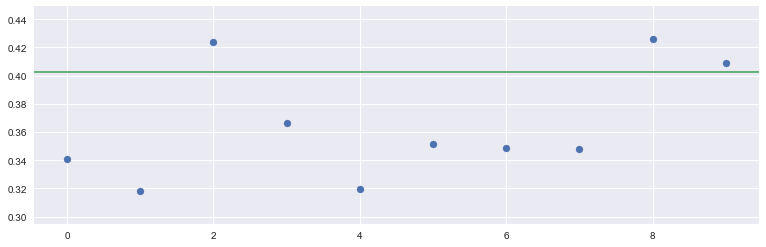

In [429]:
plt.scatter(range(len(scores)),-scores)
plt.axhline(ss_base_MSE,color=sns.color_palette()[1],label='CS')

In [456]:
(-np.mean(scores), np.std(scores))

(0.36515808215486023, 0.038409425665003806)

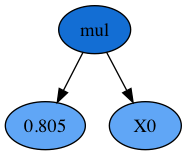

In [350]:
graph = pydotplus.graphviz.graph_from_dot_data(est_gp._program.export_graphviz())
Image(graph.create_png())

In [371]:
df_singSound_SR[330:]

,function,fitness
398,"mul(X0, 0.759)",0.374479
287,"mul(X0, 0.759)",0.374507
357,"mul(X0, 0.759)",0.374559
33,"mul(0.805, X0)",0.374740
429,"mul(X0, 0.759)",0.374823
333,"mul(X0, 0.759)",0.374839
347,"mul(X0, 0.759)",0.374864
202,"mul(X0, 0.759)",0.374930
152,"mul(X0, 0.759)",0.374983
162,"mul(X0, 0.759)",0.375268


### CS

In [25]:
X_CS = df_3s.ix[:,1].values
y_CS = df_3s.ix[:,2].values

X_CS_train, X_CS_test, y_CS_train, y_CS_test = train_test_split(X_CS, y_CS, test_size=0.3, random_state=0)
X_CS_train = X_CS_train.reshape(-1,1)
y_CS_train = y_CS_train.reshape(-1,1)
X_CS_test = X_CS_test.reshape(-1,1)
y_CS_test = y_CS_test.reshape(-1,1)

In [26]:
function_set = ['add', 'sub', 'mul', 'div',
                'sqrt', 'log', 'neg', 'inv']
est_gp = genetic.SymbolicRegressor(population_size=500, # 随机生成的公式树数量
                           generations=50, # 迭代次数
                           function_set = function_set,
                           metric = 'mse',
                           p_crossover=0.7, # 交叉概率
                           p_subtree_mutation=0.05, # 子树变异概率
                           p_hoist_mutation=0.01, # hoiest变异概率
                           p_point_mutation=0.05, # 点变异概率
                           max_samples=0.9, # 每一代的进化中，留下的样本比例
                           verbose=1, # 包外估计
                           parsimony_coefficient=0.01, # 节俭系数，用于惩罚过于复杂的公式；值越大惩罚力度越大
                           random_state=0) #随机种子

est_gp.fit(X_CS_train, y_CS_train)

    |    Population Average   |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    15.46    51006176416.5        8   0.684605763148   0.735338204234     43.81s
   1     8.53    186.405268086       15   0.608836779554   0.641445631775     39.29s
   2     6.29    1210.96067627       14   0.608278154215   0.532698873438     37.85s
   3      4.3    4534.33781312       14   0.593272719422   0.667730715551     33.80s
   4     3.99    18.0501058191        4   0.636191423843   0.733578696099     31.99s
   5     4.03    853.486875696        4   0.621062628627   0.682369199296     29.52s
   6     4.07    6.99962757232        4   0.625042430603   0.646555509154     27.65s
   7     4.06    110.662748856        4   0.615136285676   0.735699543713     26.17s
   8     4.08    25.7014033124        4   0.612372665931   0.757301160071  

SymbolicRegressor(const_range=(-1.0, 1.0),
         function_set=['add', 'sub', 'mul', 'div', 'sqrt', 'log', 'neg', 'inv'],
         generations=50, init_depth=(2, 6), init_method='half and half',
         max_samples=0.9, metric='mse', n_jobs=1, p_crossover=0.7,
         p_hoist_mutation=0.01, p_point_mutation=0.05,
         p_point_replace=0.05, p_subtree_mutation=0.05,
         parsimony_coefficient=0.01, population_size=500, random_state=0,
         stopping_criteria=0.0, tournament_size=20, verbose=1,
         warm_start=False)

In [27]:
print est_gp
print est_gp._program.fitness_
print est_gp._program.raw_fitness_

mul(X0, sqrt(0.440))
0.647588722565
0.607588722565


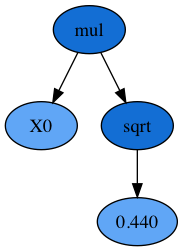

In [28]:
graph = pydotplus.graphviz.graph_from_dot_data(est_gp._program.export_graphviz())
Image(graph.create_png())

In [374]:
df_CS_SR = DataFrame()
CS_func = []
CS_fitness = []
for program in est_gp._programs[-1]:
    CS_func.append(program)
    CS_fitness.append(program.raw_fitness_)
df_CS_SR['function'] = CS_func
df_CS_SR['fitness'] = CS_fitness
df_CS_SR = df_CS_SR.sort_values(by = 'fitness')

In [415]:
df_CS_SR[280:]

,function,fitness
394,"mul(X0, 0.440)",0.651512
99,"mul(X0, 0.440)",0.652403
327,"mul(mul(X0, sqrt(0.440)), sqrt(0.440))",0.652466
378,"mul(X0, sqrt(sqrt(0.440)))",0.652788
438,"mul(X0, 0.440)",0.654024
127,"mul(X0, 0.440)",0.654837
92,"mul(X0, 0.440)",0.654918
318,"mul(mul(X0, sqrt(0.440)), sqrt(0.440))",0.655103
193,"mul(X0, sqrt(sqrt(0.440)))",0.656444
389,"mul(X0, 0.440)",0.656805


# 根据符号回归的结果进行转换

(0, 1)

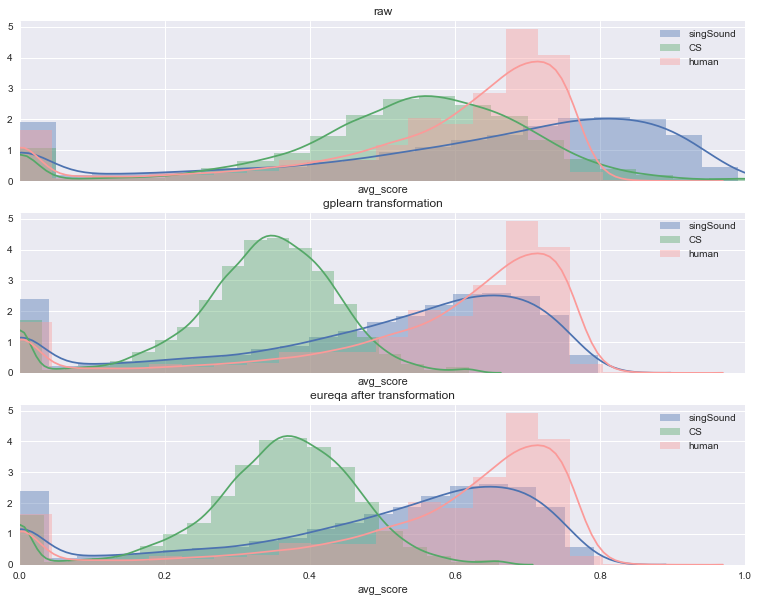

In [550]:
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(13, 10), sharex=True)

# 原始分布
sns.distplot(df_all.result_overall/100,ax=ax1, label='singSound',bins=20)
sns.distplot(df_all.ppScores,ax=ax1, label='CS',bins=20)
sns.distplot(df_all.avg_score/4,ax=ax1, label='human',color=sns.color_palette("Paired")[4],bins=20)
ax1.legend()
ax1.set_title('raw')
ax1.set_xlim(0,1)

# 转换后的分布
sns.distplot(df_all.result_overall/100 * 0.805,ax=ax2, label='singSound',bins=20)
sns.distplot(df_all.ppScores * 0.619,ax=ax2, label='CS',bins=20)
sns.distplot(df_all.avg_score/4,ax=ax2, label='human', color=sns.color_palette("Paired")[4],bins=20)
ax2.legend()
ax2.set_title('gplearn transformation')
ax2.set_xlim(0,1)

# 转换后的分布
sns.distplot(df_all.result_overall/100 * 0.799,ax=ax3, label='singSound',bins=20)
sns.distplot(df_all.ppScores * 0.66,ax=ax3, label='CS',bins=20)
sns.distplot(df_all.avg_score/4,ax=ax3, label='human', color=sns.color_palette("Paired")[4],bins=20)
ax3.legend()
ax3.set_title('eureqa after transformation')
ax3.set_xlim(0,1)

In [438]:
# KL散度， 比较两个分布的相似性
ss_human_kl = np.sum(ss_score * np.log(ss_score/human_score))
cs_human_kl = np.sum(cs_score * np.log(cs_score/human_score))
(ss_human_kl, cs_human_kl)

/Applications/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':
/Applications/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in log
  from ipykernel import kernelapp as app


(1018.1970310706681, 1190.3604091420616)

In [439]:
# gplearn
ss_human_kl = np.sum(ss_score*0.805 * np.log(ss_score*0.805/human_score))
cs_human_kl = np.sum(cs_score*0.619 * np.log(cs_score*0.619/human_score))
(ss_human_kl, cs_human_kl)

/Applications/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':
/Applications/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in log
  from ipykernel import kernelapp as app


(711.0304197066596, 592.2727106406755)

# 准确的数据 和 不准确的

In [60]:
df_good = df_all[df_all.result_info_tipId == 0]
df_good = pd.concat([df_good, df_all[df_all.result_info_tipId != 0][df_all.result_overall >= 60]],axis=0)
df_bad = df_all[df_all.result_info_tipId != 0][df_all.result_overall < 60]

/Applications/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/Applications/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


In [61]:
ss_score_good = (df_good.result_overall-df_good.result_overall.mean()) / df_good.result_overall.std()
human_score_good = (df_good.avg_score - df_good.avg_score.mean()) / df_good.avg_score.std()

ss_score_bad = (df_bad.result_overall-df_bad.result_overall.mean()) / df_bad.result_overall.std()
human_score_bad = (df_bad.avg_score - df_bad.avg_score.mean()) / df_bad.avg_score.std()

In [62]:
ss_base_MSE_good = mean_squared_error(ss_score_good, human_score_good)
ss_base_MSE_bad = mean_squared_error(ss_score_bad, human_score_bad)

(ss_base_MSE_good, ss_base_MSE_bad)

(0.54607368731167494, 0.54176097929296252)

In [63]:
ss_base_MSE_good = mean_squared_error(ss_score_good*0.805, human_score_good)
ss_base_MSE_bad = mean_squared_error(ss_score_bad*0.805, human_score_bad)

(ss_base_MSE_good,ss_base_MSE_bad)

(0.47761058668629458, 0.47412652369205366)

In [39]:
df_3s_good = DataFrame()
df_3s_good['singSound'] = ss_score_good
df_3s_good['human'] = human_score_good

df_3s_bad = DataFrame()
df_3s_bad['singSound'] = ss_score_bad
df_3s_bad['human'] = human_score_bad

(0, 1)

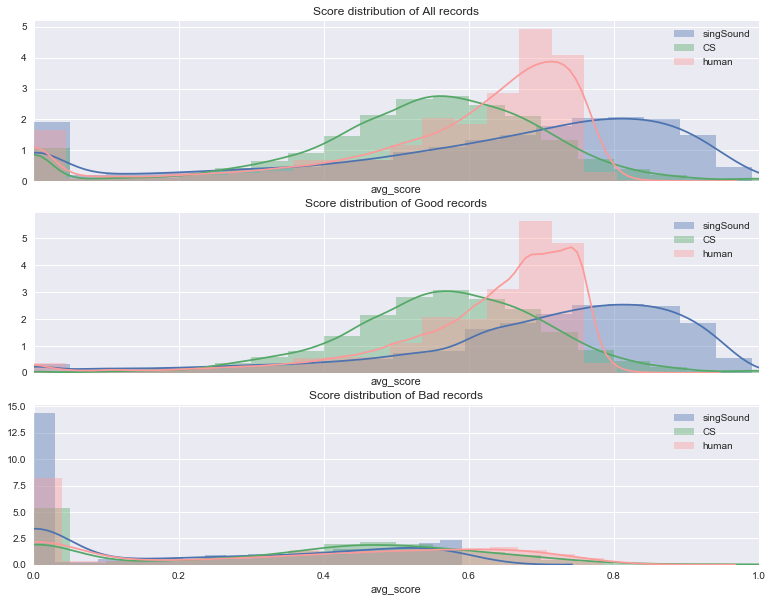

In [538]:
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(13, 10), sharex=True)

# 都经过了标准化
# 总的
sns.distplot(df_all.result_overall/100,ax=ax1, label='singSound',bins=20)
sns.distplot(df_all.ppScores,ax=ax1, label='CS',bins=20)
sns.distplot(df_all.avg_score / 4,ax=ax1, label='human',color=sns.color_palette("Paired")[4],bins=20)
ax1.legend()
ax1.set_title('Score distribution of All records')
ax1.set_xlim(0,1)

# good
sns.distplot(df_good.result_overall/100,ax=ax2, label='singSound',bins=20)
sns.distplot(df_good.ppScores,ax=ax2, label='CS',bins=20)
sns.distplot(df_good.avg_score / 4,ax=ax2, label='human',color=sns.color_palette("Paired")[4],bins=20)
ax2.legend()
ax2.set_title('Score distribution of Good records')
ax2.set_xlim(0,1)

# bad
sns.distplot(df_bad.result_overall/100,ax=ax3, label='singSound',bins=20)
sns.distplot(df_bad.ppScores,ax=ax3, label='CS',bins=20)
sns.distplot(df_bad.avg_score / 4,ax=ax3, label='human',color=sns.color_palette("Paired")[4],bins=20)
ax3.legend()
ax3.set_title('Score distribution of Bad records')
ax3.set_xlim(0,1)

# singSound

#### 准确的ss

In [41]:
X_singSound_good = df_3s_good.ix[:,0].values
y_singSound_good = df_3s_good.ix[:,1].values

X_singSound_good_train, X_singSound_good_test, y_singSound_good_train, y_singSound_good_test = train_test_split(X_singSound_good, y_singSound_good, test_size=0.3, random_state=0)
X_singSound_good_train = X_singSound_good_train.reshape(-1,1)
y_singSound_good_train = y_singSound_good_train.reshape(-1,1)
X_singSound_good_test = X_singSound_good_test.reshape(-1,1)
y_singSound_good_test = y_singSound_good_test.reshape(-1,1)
X_singSound_good = X_singSound_good.reshape(-1,1)
y_singSound_good = y_singSound_good.reshape(-1,1)

In [74]:
function_set = ['add', 'sub', 'mul', 'div',
                'sqrt', 'log', 'neg', 'inv']
est_gp = genetic.SymbolicRegressor(population_size=500, # 随机生成的公式树数量
                           generations=50, # 迭代次数
                           function_set = function_set,
                           metric = 'mse',
                           p_crossover=0.7, # 交叉概率
                           p_subtree_mutation=0.01, # 子树变异概率
                           p_hoist_mutation=0.05, # hoiest变异概率
                           p_point_mutation=0.01, # 点变异概率
                           max_samples=0.9, # 每一代的进化中，留下的样本比例
                           verbose=1, # 包外估计
                           parsimony_coefficient=0.01, # 节俭系数，用于惩罚过于复杂的公式；值越大惩罚力度越大
                           random_state=0) #随机种子

result_ss_good = est_gp.fit(X_singSound_good_train, y_singSound_good_train)

    |    Population Average   |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    15.46     7117193.8868        4   0.545174376883   0.619597957196     38.95s
   1     8.81    204.226962425        3   0.510838957774   0.504561722436     32.66s
   2     5.35    67.9933539889       12   0.477815741517   0.453782807001     28.99s
   3     2.19    1.61477438406        5   0.482855103544   0.517653004816     25.27s
   4     3.05    1.23175816392        7   0.473736387589   0.497638750082     23.28s
   5      3.4    19.3490966444        7   0.472900060652   0.505157493227     21.75s
   6      4.0    1.17614858581        7   0.468197547648   0.547434007198     20.63s
   7     4.29   0.841957678646        7   0.466772143033   0.560248674178     19.59s
   8     4.61    2.34133003261        7   0.463616118526   0.588621953323  

In [75]:
print result_ss_good
print result_ss_good._program.fitness_
print result_ss_good._program.raw_fitness_

mul(X0, 0.759)
0.494396431027
0.464396431027


In [466]:
# 交叉验证来看平均的score，排除是否由于验证集的划分导致
from sklearn.model_selection import cross_val_score
function_set = ['add', 'sub', 'mul', 'div',
                'sqrt', 'log', 'neg', 'inv']
est_gp = genetic.SymbolicRegressor(population_size=500, # 随机生成的公式树数量
                           generations=50, # 迭代次数
                           function_set = function_set,
                           metric = 'mse',
                           p_crossover=0.7, # 交叉概率
                           p_subtree_mutation=0.05, # 子树变异概率
                           p_hoist_mutation=0.01, # hoiest变异概率
                           p_point_mutation=0.05, # 点变异概率
                           max_samples=0.9, # 每一代的进化中，留下的样本比例
                           verbose=1, # 包外估计
                           parsimony_coefficient=0.01, # 节俭系数，用于惩罚过于复杂的公式；值越大惩罚力度越大
                           random_state=0) #随机种子
ss_scores_good = cross_val_score(est_gp, X_singSound_good, y_singSound_good, cv=10, scoring='neg_mean_squared_error')
ss_scores_good                                           

    |    Population Average   |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    15.46    6651204.03898        4   0.541459221569   0.487402316346     47.23s
   1     9.03    168.976949926        3   0.494491498024   0.507672643905     41.85s
   2     5.51    74.6941890094       16   0.462496381019    0.49310181376     35.87s
   3     2.29    18.1833672688        5    0.47766189671   0.441956818802     30.76s
   4      3.1    13.7077079189        5   0.466334790879   0.543789721225     28.17s
   5     3.26    110.460845839        3   0.455192728222   0.558586602264     26.77s
   6     3.66    2.26742038562        5   0.459852382776   0.526720165019     25.62s
   7     3.74    13.5105361776        3   0.457524037958   0.537627670617     24.76s
   8     3.13    2.76438392454        3   0.455399923944   0.556723872092  

array([-0.5357, -0.5191, -0.5389, -0.4775, -0.5567, -0.5779, -0.6221,
       -0.3496, -0.2891, -0.2553])

In [73]:
# 引入evolutionary_search 来进行参数搜索
# 本质上同样是遗传算法，可以指数减少时间。 不是尝试每种可能的参数组合，而只是演变出能够给出最佳结果的组合。
from evolutionary_search import EvolutionaryAlgorithmSearchCV
params = {'population_size': [500],
          'generations': [20, 50],
          'function_set': [{'add', 'sub', 'mul', 'div','sqrt', 'log', 'neg', 'inv'}],
          'metric': ['mse'],
          'p_crossover': [0.6,0.7,0.8],
          'p_subtree_mutation': [0.01, 0.05],
          'p_hoist_mutation': [0.01, 0.05],
          'p_point_mutation': [0.01, 0.05]          
         }
singSound_cv = EvolutionaryAlgorithmSearchCV(estimator=genetic.SymbolicRegressor(),
                                   params=params,
                                   scoring="neg_mean_squared_error",
                                   verbose=1,
                                   population_size=50,
                                   gene_mutation_prob=0.10,
                                   gene_crossover_prob=0.5,
                                   tournament_size=3,
                                   generations_number=5,
                                   n_jobs=4)
singSound_cv.fit(X_singSound_good_train, y_singSound_good_train)

Types [2, 1, 2, 2, 1, 2, 1, 1] and maxint [2, 0, 1, 1, 0, 1, 0, 1] detected


/Applications/anaconda/envs/py27/lib/python2.7/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/Applications/anaconda/envs/py27/lib/python2.7/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


--- Evolve in 48 possible combinations ---
gen	nevals	avg      	min      	max      	std       
0  	50    	-0.475543	-0.480263	-0.471288	0.00171256
1  	21    	-0.475033	-0.479307	-0.468577	0.00208603
2  	31    	-0.475254	-0.481975	-0.468577	0.00245759
3  	23    	-0.474551	-0.478066	-0.468577	0.00192152
4  	21    	-0.474099	-0.479053	-0.468577	0.00219343
5  	29    	-0.474665	-0.480789	-0.468577	0.00245031
Best individual is: {'p_crossover': 0.7, 'metric': 'mse', 'p_point_mutation': 0.01, 'population_size': 500, 'p_subtree_mutation': 0.01, 'p_hoist_mutation': 0.05, 'function_set': set(['sub', 'neg', 'inv', 'sqrt', 'add', 'mul', 'div', 'log']), 'generations': 20}
with fitness: -0.468576873183


In [471]:
-np.mean(ss_scores_good),np.std(ss_scores_good)

(0.47218873966641112, 0.1212822428269292)

#### 不准确的ss

In [45]:
X_singSound_bad = df_3s_bad.ix[:,0].values
y_singSound_bad = df_3s_bad.ix[:,1].values

X_singSound_bad_train, X_singSound_bad_test, y_singSound_bad_train, y_singSound_bad_test = train_test_split(X_singSound_bad, y_singSound_bad, test_size=0.3, random_state=0)
X_singSound_bad_train = X_singSound_bad_train.reshape(-1,1)
y_singSound_bad_train = y_singSound_bad_train.reshape(-1,1)
X_singSound_bad_test = X_singSound_bad_test.reshape(-1,1)
y_singSound_bad_test = y_singSound_bad_test.reshape(-1,1)
X_singSound_bad = X_singSound_bad.reshape(-1,1)
y_singSound_bad = y_singSound_bad.reshape(-1,1)

/Applications/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


In [77]:
function_set = ['add', 'sub', 'mul', 'div',
                'sqrt', 'log', 'neg', 'inv']
est_gp = genetic.SymbolicRegressor(population_size=500, # 随机生成的公式树数量
                           generations=50, # 迭代次数
                           function_set = function_set,
                           metric = 'mse',
                           p_crossover=0.6, # 交叉概率
                           p_subtree_mutation=0.01, # 子树变异概率
                           p_hoist_mutation=0.01, # hoiest变异概率
                           p_point_mutation=0.01, # 点变异概率
                           max_samples=0.9, # 每一代的进化中，留下的样本比例
                           verbose=1, # 包外估计
                           parsimony_coefficient=0.01, # 节俭系数，用于惩罚过于复杂的公式；值越大惩罚力度越大
                           random_state=0) #随机种子

result_ss_bad = est_gp.fit(X_singSound_bad_train, y_singSound_bad_train)

    |    Population Average   |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    15.46    5832574.47919        6    0.47144644163   0.502266707623     24.57s
   1     9.84    1268.10104285        6   0.455975055785   0.641136375743     21.10s
   2     5.83    30.7574932427       12   0.445175273067   0.542196756423     17.82s
   3      3.6    1.12103010071        3   0.442677491721   0.539692538687     15.59s
   4     3.01    0.61131443094        3   0.432648303575   0.629713564814     15.37s
   5     2.93   0.549433111047        3   0.434519264691   0.612919998173     14.17s
   6     3.02    0.69752765176        3   0.426864478323   0.681628622799     13.15s
   7     2.87     0.6929967033        3   0.433356820806   0.623353982442     12.84s
   8     2.95   0.661411763664        3   0.432766738931   0.628650500475  

In [76]:
# 引入evolutionary_search 来进行参数搜索
# 本质上同样是遗传算法，可以指数减少时间。 不是尝试每种可能的参数组合，而只是演变出能够给出最佳结果的组合。
from evolutionary_search import EvolutionaryAlgorithmSearchCV
params = {'population_size': [500],
          'generations': [20, 50],
          'function_set': [{'add', 'sub', 'mul', 'div','sqrt', 'log', 'neg', 'inv'}],
          'metric': ['mse'],
          'p_crossover': [0.6,0.7,0.8],
          'p_subtree_mutation': [0.01, 0.05],
          'p_hoist_mutation': [0.01, 0.05],
          'p_point_mutation': [0.01, 0.05]          
         }
singSound_cv = EvolutionaryAlgorithmSearchCV(estimator=genetic.SymbolicRegressor(),
                                   params=params,
                                   scoring="neg_mean_squared_error",
                                   verbose=1,
                                   population_size=50,
                                   gene_mutation_prob=0.10,
                                   gene_crossover_prob=0.5,
                                   tournament_size=3,
                                   generations_number=5,
                                   n_jobs=4)
singSound_cv.fit(X_singSound_bad_train, y_singSound_bad_train)

Types [2, 1, 2, 2, 1, 2, 1, 1] and maxint [2, 0, 1, 1, 0, 1, 0, 1] detected
--- Evolve in 48 possible combinations ---
gen	nevals	avg      	min      	max      	std       
0  	50    	-0.446989	-0.459287	-0.421272	0.00740929
1  	34    	-0.444613	-0.454328	-0.421174	0.00703183
2  	22    	-0.442798	-0.459344	-0.421174	0.00868823
3  	32    	-0.441643	-0.456339	-0.421174	0.00957388
4  	32    	-0.442557	-0.458425	-0.421174	0.0115137 
5  	32    	-0.441546	-0.454704	-0.421174	0.0114745 
Best individual is: {'p_crossover': 0.6, 'metric': 'mse', 'p_point_mutation': 0.01, 'population_size': 500, 'p_subtree_mutation': 0.01, 'p_hoist_mutation': 0.01, 'function_set': set(['sub', 'neg', 'inv', 'sqrt', 'add', 'mul', 'div', 'log']), 'generations': 50}
with fitness: -0.421173825314


In [78]:
print result_ss_bad
print result_ss_bad._program.fitness_
print result_ss_bad._program.raw_fitness_

mul(X0, 0.731)
0.463221242295
0.433221242295


In [473]:
-np.mean(ss_scores_bad),np.std(ss_scores_bad)

(0.46836069659169277, 0.085329439613760924)

# CS

#### 准确的

In [79]:
df_good = df_all[df_all.AQstatus == 0]
df_bad = df_all[df_all.AQstatus != 0]

In [80]:
cs_score_good = (df_good.ppScores-df_good.ppScores.mean()) / df_good.ppScores.std()
human_score_good = (df_good.avg_score - df_good.avg_score.mean()) / df_good.avg_score.std()

cs_score_bad = (df_bad.ppScores-df_bad.ppScores.mean()) / df_bad.ppScores.std()
human_score_bad = (df_bad.avg_score - df_bad.avg_score.mean()) / df_bad.avg_score.std()

In [81]:
# base MSE
cs_base_MSE_good = mean_squared_error(cs_score_good, human_score_good)
cs_base_MSE_bad = mean_squared_error(cs_score_bad, human_score_bad)

(cs_base_MSE_good, cs_base_MSE_bad)

(1.2726386199453106, 0.53657837565240063)

In [82]:
# Transform MSE
cs_base_MSE_good = mean_squared_error(cs_score_good*0.619, human_score_good)
cs_base_MSE_bad = mean_squared_error(cs_score_bad*0.619, human_score_bad)

(cs_base_MSE_good, cs_base_MSE_bad)

(0.93290507657670796, 0.47727402870614749)

In [83]:
df_3s_good = DataFrame()
df_3s_good['CS'] = cs_score_good
df_3s_good['human'] = human_score_good

df_3s_bad = DataFrame()
df_3s_bad['CS'] = cs_score_bad
df_3s_bad['human'] = human_score_bad

In [84]:
X_cs_good = df_3s_good.ix[:,0].values
y_cs_good = df_3s_good.ix[:,1].values

X_cs_good_train, X_cs_good_test, y_cs_good_train, y_cs_good_test = train_test_split(X_cs_good, y_cs_good, test_size=0.3, random_state=0)
X_cs_good_train = X_cs_good_train.reshape(-1,1)
y_cs_good_train = y_cs_good_train.reshape(-1,1)
X_cs_good_test = X_cs_good_test.reshape(-1,1)
y_cs_good_test = y_cs_good_test.reshape(-1,1)
X_cs_good = X_cs_good.reshape(-1,1)
y_cs_good = y_cs_good.reshape(-1,1)

/Applications/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


In [86]:
function_set = ['add', 'sub', 'mul', 'div',
                'sqrt', 'log', 'neg', 'inv']
est_gp = genetic.SymbolicRegressor(population_size=500, # 随机生成的公式树数量
                           generations=50, # 迭代次数
                           function_set = function_set,
                           metric = 'mse',
                           p_crossover=0.6, # 交叉概率
                           p_subtree_mutation=0.01, # 子树变异概率
                           p_hoist_mutation=0.01, # hoiest变异概率
                           p_point_mutation=0.01, # 点变异概率
                           max_samples=0.9, # 每一代的进化中，留下的样本比例
                           verbose=1, # 包外估计
                           parsimony_coefficient=0.01, # 节俭系数，用于惩罚过于复杂的公式；值越大惩罚力度越大
                           random_state=0) #随机种子

result_cs_good = est_gp.fit(X_cs_good_train, y_cs_good_train)

    |    Population Average   |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    15.46    48867230263.6       12   0.884481288524   0.874564623198     35.75s
   1     8.72    153.391867538       12   0.859166883945    1.10210714451     29.89s
   2     7.16    59.9017811918       12   0.855086026138    1.13878857905     29.38s
   3     8.16    20.3915531828       12   0.860393797521    1.09107883816     28.71s
   4     4.04    3.19837852396        4   0.862798058624    1.14797834702     26.57s
   5     3.89    1.58063066919        4   0.864316411429    1.13433039318     24.72s
   6     4.06    2.92267694391        4   0.870216699347    1.08129472389     22.80s
   7     3.85    6.79372269991        4   0.862075864936    1.15446989899     21.85s
   8     3.91    1.23755933769        4   0.866134995105    1.11798376674  

In [87]:
print result_cs_good
print result_cs_good._program.fitness_
print result_cs_good._program.raw_fitness_

neg(mul(-0.467, X0))
0.900651118921
0.860651118921


In [88]:
# 引入evolutionary_search 来进行参数搜索
# 本质上同样是遗传算法，可以指数减少时间。 不是尝试每种可能的参数组合，而只是演变出能够给出最佳结果的组合。
from evolutionary_search import EvolutionaryAlgorithmSearchCV
params = {'population_size': [500],
          'generations': [20, 50],
          'function_set': [{'add', 'sub', 'mul', 'div','sqrt', 'log', 'neg', 'inv'}],
          'metric': ['mse'],
          'p_crossover': [0.6,0.7,0.8],
          'p_subtree_mutation': [0.01, 0.05],
          'p_hoist_mutation': [0.01, 0.05],
          'p_point_mutation': [0.01, 0.05]          
         }
cs_cv = EvolutionaryAlgorithmSearchCV(estimator=genetic.SymbolicRegressor(),
                                   params=params,
                                   scoring="neg_mean_squared_error",
                                   verbose=1,
                                   population_size=50,
                                   gene_mutation_prob=0.10,
                                   gene_crossover_prob=0.5,
                                   tournament_size=3,
                                   generations_number=5,
                                   n_jobs=4)
cs_cv.fit(X_cs_good_train, y_cs_good_train)

Types [2, 1, 2, 2, 1, 2, 1, 1] and maxint [2, 0, 1, 1, 0, 1, 0, 1] detected
--- Evolve in 48 possible combinations ---
gen	nevals	avg      	min      	max      	std       
0  	50    	-0.881225	-0.887096	-0.870101	0.00319224
1  	26    	-0.879442	-0.885503	-0.870101	0.00415544
2  	35    	-0.878856	-0.888128	-0.869569	0.00463602
3  	29    	-0.878131	-0.886157	-0.869569	0.00452932
4  	28    	-0.877084	-0.885964	-0.870101	0.00477975
5  	27    	-0.87772 	-0.888721	-0.870101	0.00541315
Best individual is: {'p_crossover': 0.7, 'metric': 'mse', 'p_point_mutation': 0.05, 'population_size': 500, 'p_subtree_mutation': 0.01, 'p_hoist_mutation': 0.05, 'function_set': set(['sub', 'neg', 'inv', 'sqrt', 'add', 'mul', 'div', 'log']), 'generations': 50}
with fitness: -0.869569126135


In [89]:
function_set = ['add', 'sub', 'mul', 'div',
                'sqrt', 'log', 'neg', 'inv']
est_gp = genetic.SymbolicRegressor(population_size=500, # 随机生成的公式树数量
                           generations=50, # 迭代次数
                           function_set = function_set,
                           metric = 'mse',
                           p_crossover=0.7, # 交叉概率
                           p_subtree_mutation=0.01, # 子树变异概率
                           p_hoist_mutation=0.05, # hoiest变异概率
                           p_point_mutation=0.05, # 点变异概率
                           max_samples=0.9, # 每一代的进化中，留下的样本比例
                           verbose=1, # 包外估计
                           parsimony_coefficient=0.01, # 节俭系数，用于惩罚过于复杂的公式；值越大惩罚力度越大
                           random_state=0) #随机种子

result_cs_good = est_gp.fit(X_cs_good_train, y_cs_good_train)

    |    Population Average   |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    15.46    48867230263.6       12   0.884481288524   0.874564623198     36.42s
   1     8.59     168.17032434       12   0.871023168779   0.995535056827     34.47s
   2     6.33    136.710757796       12   0.868383752989    1.01925986227     30.04s
   3     7.35     22.542707645       12   0.865921001887     1.0707377624     29.04s
   4      4.1     14.913670835        4   0.862798058624    1.14797834702     26.90s
   5     3.89     784.90570558        4   0.867568033795    1.10510267228     25.23s
   6     4.03    1.79855915037        4   0.870216699347    1.08129472389     23.30s
   7     3.87    10.6733744221        4   0.862075864936    1.15446989899     21.93s
   8     3.96    30.4181046549        4   0.866134995105    1.11798376674  

In [90]:
print result_cs_good
print result_cs_good._program.fitness_
print result_cs_good._program.raw_fitness_

neg(mul(-0.467, X0))
0.900651118921
0.860651118921


#### 不准确的

In [91]:
X_cs_bad = df_3s_bad.ix[:,0].values
y_cs_bad = df_3s_bad.ix[:,1].values

X_cs_bad_train, X_cs_bad_test, y_cs_bad_train, y_cs_bad_test = train_test_split(X_cs_bad, y_cs_bad, test_size=0.3, random_state=0)
X_cs_bad_train = X_cs_bad_train.reshape(-1,1)
y_cs_bad_train = y_cs_bad_train.reshape(-1,1)
X_cs_bad_test = X_cs_bad_test.reshape(-1,1)
y_cs_bad_test = y_cs_bad_test.reshape(-1,1)
X_cs_bad = X_cs_bad.reshape(-1,1)
y_cs_bad = y_cs_bad.reshape(-1,1)

/Applications/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


In [92]:
function_set = ['add', 'sub', 'mul', 'div',
                'sqrt', 'log', 'neg', 'inv']
est_gp = genetic.SymbolicRegressor(population_size=500, # 随机生成的公式树数量
                           generations=50, # 迭代次数
                           function_set = function_set,
                           metric = 'mse',
                           p_crossover=0.6, # 交叉概率
                           p_subtree_mutation=0.01, # 子树变异概率
                           p_hoist_mutation=0.01, # hoiest变异概率
                           p_point_mutation=0.01, # 点变异概率
                           max_samples=0.9, # 每一代的进化中，留下的样本比例
                           verbose=1, # 包外估计
                           parsimony_coefficient=0.01, # 节俭系数，用于惩罚过于复杂的公式；值越大惩罚力度越大
                           random_state=0) #随机种子

result_cs_bad = est_gp.fit(X_cs_bad_train, y_cs_bad_train)

    |    Population Average   |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    15.46   164362618701.0        8   0.503366583504   0.535823086391     36.56s
   1     9.14    1203.16377425        8   0.500533765583   0.561278094153     30.46s
   2     5.18     394.08464337        3   0.483646499708   0.627944148883     25.26s
   3     1.75    8.04271677813        3   0.479870953572   0.661870281401     21.40s
   4     2.99    0.77719178552        5    0.46136795321   0.607056799854     19.34s
   5     3.14   0.687521282165        7    0.46149984582   0.518721480243     17.63s
   6     3.23    2.81964417076        7   0.453636656468   0.589378173168     17.00s
   7     3.16    3.44182307015        7   0.465228944193    0.48521271595     16.16s
   8     3.43   0.830730488389        5   0.461094663523   0.609512514019  

In [93]:
print result_cs_bad
print result_cs_bad._program.fitness_
print result_cs_bad._program.raw_fitness_

mul(X0, 0.835)
0.490126017316
0.460126017316


In [94]:
# 引入evolutionary_search 来进行参数搜索
# 本质上同样是遗传算法，可以指数减少时间。 不是尝试每种可能的参数组合，而只是演变出能够给出最佳结果的组合。
from evolutionary_search import EvolutionaryAlgorithmSearchCV
params = {'population_size': [500],
          'generations': [20, 50],
          'function_set': [{'add', 'sub', 'mul', 'div','sqrt', 'log', 'neg', 'inv'}],
          'metric': ['mse'],
          'p_crossover': [0.6,0.7,0.8],
          'p_subtree_mutation': [0.01, 0.05],
          'p_hoist_mutation': [0.01, 0.05],
          'p_point_mutation': [0.01, 0.05]          
         }
cs_cv = EvolutionaryAlgorithmSearchCV(estimator=genetic.SymbolicRegressor(),
                                   params=params,
                                   scoring="neg_mean_squared_error",
                                   verbose=1,
                                   population_size=50,
                                   gene_mutation_prob=0.10,
                                   gene_crossover_prob=0.5,
                                   tournament_size=3,
                                   generations_number=5,
                                   n_jobs=4)
cs_cv.fit(X_cs_bad_train, y_cs_bad_train)

Types [2, 1, 2, 2, 1, 2, 1, 1] and maxint [2, 0, 1, 1, 0, 1, 0, 1] detected
--- Evolve in 48 possible combinations ---
gen	nevals	avg      	min      	max      	std      
0  	50    	-0.451838	-0.468953	-0.432846	0.0109922
1  	37    	-0.448728	-0.468267	-0.414209	0.0116505
2  	32    	-0.448197	-0.467616	-0.427421	0.011811 
3  	37    	-0.448304	-0.468572	-0.418858	0.0116261
4  	36    	-0.44765 	-0.471424	-0.418858	0.0119638
5  	22    	-0.44348 	-0.469053	-0.418858	0.0125298
Best individual is: {'p_crossover': 0.6, 'metric': 'mse', 'p_point_mutation': 0.05, 'population_size': 500, 'p_subtree_mutation': 0.05, 'p_hoist_mutation': 0.05, 'function_set': set(['sub', 'neg', 'inv', 'sqrt', 'add', 'mul', 'div', 'log']), 'generations': 20}
with fitness: -0.414209496881


In [95]:
function_set = ['add', 'sub', 'mul', 'div',
                'sqrt', 'log', 'neg', 'inv']
est_gp = genetic.SymbolicRegressor(population_size=500, # 随机生成的公式树数量
                           generations=50, # 迭代次数
                           function_set = function_set,
                           metric = 'mse',
                           p_crossover=0.6, # 交叉概率
                           p_subtree_mutation=0.05, # 子树变异概率
                           p_hoist_mutation=0.05, # hoiest变异概率
                           p_point_mutation=0.05, # 点变异概率
                           max_samples=0.9, # 每一代的进化中，留下的样本比例
                           verbose=1, # 包外估计
                           parsimony_coefficient=0.01, # 节俭系数，用于惩罚过于复杂的公式；值越大惩罚力度越大
                           random_state=0) #随机种子

result_cs_bad = est_gp.fit(X_cs_bad_train, y_cs_bad_train)

    |    Population Average   |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    15.46   164362618701.0        8   0.503366583504   0.535823086391     27.10s
   1      9.1    1454.90206057        8   0.500533765583   0.561278094153     22.98s
   2     5.47    1345.70849835        3    0.48511210859   0.614774546564     19.67s
   3     1.87     25.465635416        5   0.474824563035   0.486139001026     16.65s
   4     3.03    191.794744221        5    0.46136795321   0.607056799854     15.29s
   5      3.3    2.51396511903        7   0.466549554517   0.473346035147     14.34s
   6     3.23    3.09676096247        7   0.453636656468   0.589378173168     15.11s
   7     3.24     49688.220117        5    0.46075097009   0.612600859001     14.13s
   8     3.58    9.61030556782        5   0.461094663523   0.609512514019  

In [96]:
print result_cs_bad
print result_cs_bad._program.fitness_
print result_cs_bad._program.raw_fitness_

mul(X0, 0.749)
0.48194746227
0.45194746227


In [ ]:
df_3s_good = DataFrame()
df_3s_good['CS'] = cs_score_good
df_3s_good['human'] = human_score_good

df_3s_bad = DataFrame()
df_3s_bad['CS'] = cs_score_bad
df_3s_bad['human'] = human_score_bad

In [105]:
df_eureqa_cs_good = DataFrame()
df_eureqa_cs_good['cs_good'] = cs_score_good.values
df_eureqa_cs_good['cs_good_human'] = human_score_good.values
df_eureqa_cs_bad = DataFrame()
df_eureqa_cs_bad['cs_bad'] = cs_score_bad.values
df_eureqa_cs_bad['cs_bad_human'] = human_score_bad.values

In [106]:
df_good = df_all[df_all.result_info_tipId == 0]
df_good = pd.concat([df_good, df_all[df_all.result_info_tipId != 0][df_all.result_overall >= 60]],axis=0)
df_bad = df_all[df_all.result_info_tipId != 0][df_all.result_overall < 60]

/Applications/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/Applications/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


In [107]:
ss_score_good = (df_good.result_overall-df_good.result_overall.mean()) / df_good.result_overall.std()
human_score_good = (df_good.avg_score - df_good.avg_score.mean()) / df_good.avg_score.std()

ss_score_bad = (df_bad.result_overall-df_bad.result_overall.mean()) / df_bad.result_overall.std()
human_score_bad = (df_bad.avg_score - df_bad.avg_score.mean()) / df_bad.avg_score.std()

In [108]:
df_eureqa_ss_good = DataFrame()
df_eureqa_ss_good['ss_good'] = ss_score_good.values
df_eureqa_ss_good['ss_good_human'] = human_score_good.values
df_eureqa_ss_bad = DataFrame()
df_eureqa_ss_bad['ss_bad'] = ss_score_bad.values
df_eureqa_ss_bad['ss_bad_human'] = human_score_bad.values

In [109]:
df_eureqa_ss_good.to_csv('../../Desktop/Eureqa/ss_good.csv')
df_eureqa_ss_bad.to_csv('../../Desktop/Eureqa/ss_bad.csv')
df_eureqa_cs_good.to_csv('../../Desktop/Eureqa/cs_good.csv')
df_eureqa_cs_bad.to_csv('../../Desktop/Eureqa/cs_bad.csv')

------------------

# 没有normalize之前

In [113]:
ss_score = df_all.result_overall / 100
human_score = df_all.avg_score / 4
cs_score = df_all.ppScores

# singSound